In [1]:
import pandas as pd
import seaborn as sns
import numpy
import matplotlib.pyplot as plt

sns.set_theme()

In [2]:
filename = "comparison"

In [3]:
results = pd.read_csv(f"../results/{filename}.csv")

### Best by score


In [4]:
results["score"] = results.apply(
    lambda x: 10_000 * x.accuracy - 200 * x.n_features, axis=1
)

best_by_score = (
    results.sort_values("score", ascending=False)
    .groupby(["feature_selector", "classifier", "n_features"])
    .first()
    .reset_index()
)[
    [
        "feature_selector",
        "classifier",
        "n_features",
        "accuracy",
        "accuracy_top_20pc",
        "score",
    ]
]

best_by_score.sort_values("score", ascending=False).head(10)

,feature_selector,classifier,n_features,accuracy,accuracy_top_20pc,score
8,SelectFromModel,RandomForestClassifier,4,0.655,0.705,5750.0
1,RFE,RandomForestClassifier,4,0.655,0.705,5750.0
2,RFE,RandomForestClassifier,7,0.683,0.755,5430.0
9,SelectFromModel,RandomForestClassifier,7,0.683,0.755,5430.0
14,SelectKBest,GradientBoostingClassifier,1,0.554,0.610,5340.0
51,SequentialFeatureSelector,RandomForestClassifier,7,0.674,0.720,5340.0
28,SelectKBest,QuadraticDiscriminantAnalysis,1,0.553,0.590,5330.0
42,SelectKBest,SVC,1,0.552,0.600,5320.0
0,RFE,RandomForestClassifier,1,0.545,0.565,5250.0
7,SelectFromModel,RandomForestClassifier,1,0.545,0.565,5250.0


### Plots


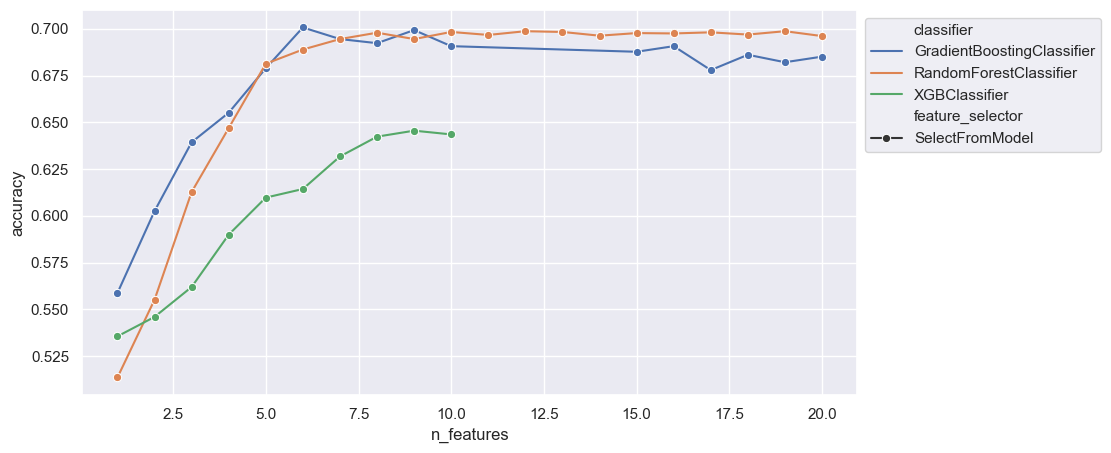

In [5]:
best_by_acc = (
    results.sort_values("accuracy", ascending=False)
    .groupby(["feature_selector", "classifier", "n_features"])
    .first()
    .reset_index()
)

plt.figure(figsize=(10, 5))
ax = sns.lineplot(
    data=best_by_acc,
    x="n_features",
    y="accuracy",
    hue="classifier",
    style="feature_selector",
    markers=True,
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

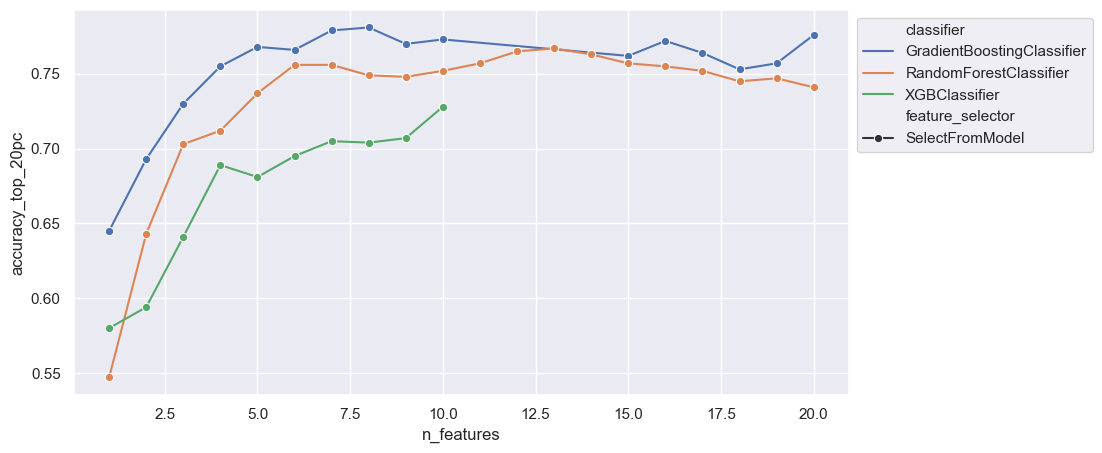

In [6]:
best_by_acc_top_20pc = (
    results.sort_values("accuracy_top_20pc", ascending=False)
    .groupby(["feature_selector", "classifier", "n_features"])
    .first()
    .reset_index()
)

plt.figure(figsize=(10, 5))
ax = sns.lineplot(
    data=best_by_acc_top_20pc,
    x="n_features",
    y="accuracy_top_20pc",
    hue="classifier",
    style="feature_selector",
    markers=True,
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

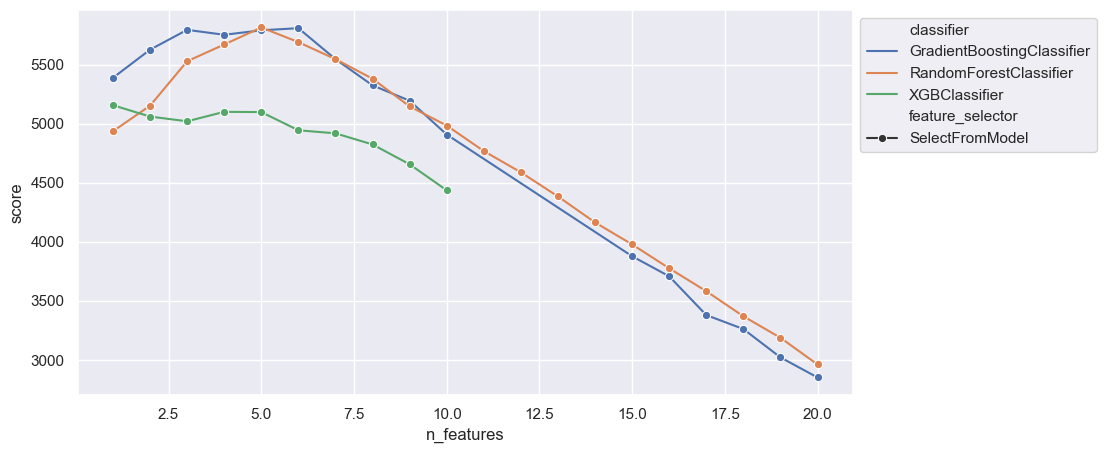

In [7]:
plt.figure(figsize=(10, 5))
ax = sns.lineplot(
    data=best_by_score,
    x="n_features",
    y="score",
    hue="classifier",
    style="feature_selector",
    markers=True,
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()